In [1]:
import os
import time
import sys
import scipy
import glob
import importlib
import _pickle as pkl
import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.use('nbagg')
import seaborn as sns
import pylab as pl

from datetime import datetime

# import some custom funcs
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import utils as util
import behavior as butil

import shutil
import scipy.stats as spstats

import trajectory as traj
import plotting as putil

In [2]:
util.set_sns_style(style='dark', min_fontsize=12)
pl.rcParams['svg.fonttype'] = 'none'
%matplotlib notebook

plot_style = 'white'
util.set_sns_style(style=plot_style)
bg_color = 'k' if plot_style=='white' else 'w' 
boutdir_palette = {'inodor': bg_color, 'inbound': 'c', 'outbound': 'm'}
plot_st = '_yt' if plot_style == 'white' else ''
instrip_palette = {True: 'r', False: 'cornflowerblue'}

In [3]:
#srcdir = '/home/julianarhee/Documents/projects/plume-tracking/data'
# rootdir='/Users/julianarhee/Library/CloudStorage/GoogleDrive-edge.tracking.ru@gmail.com/My Drive/Edge_Tracking/Data'
rootdir = util.get_rootdir()
print(rootdir)

srcdir = os.path.join(rootdir, 'jyr', 'plume_geometries', 'data')
fnames = os.listdir(srcdir)
fnames

/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data


['0-curated.pkl',
 'from_andy',
 'info.pkl',
 'combined_df.pkl',
 'T_plume.pkl',
 '45-degree.pkl',
 'errors',
 '15-degree.pkl']

In [4]:
import _pickle as pkl

In [296]:
experiment = 'T-plume' #'0-curated' #'45-degree' #'0-curated' #'15-degree' #'T_plume'
create_new = False
combined_fpath = os.path.join(srcdir, '{}.pkl'.format(experiment))
if not os.path.exists(combined_fpath):
    create_new = True
else:
    print("loading: ", combined_fpath)
    with open(combined_fpath, 'rb') as f:
        df0_all = pkl.load(f)
if create_new:
    print("Creating combined data source")
    fpath = os.path.join(srcdir, 'from_andy', '{}.p'.format(experiment))
    print(fpath)
    with open(fpath, 'rb') as f:
        dfdict = pkl.load(f)
print(create_new)

loading:  /home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/plume_geometries/data/T-plume.pkl
False


## get combined DF

In [297]:
# #dfdict['03042022-140837_T_plume.log']['data']
# if create_new:
#     d_list = []
#     for fi, (fn, df_) in enumerate(dfdict.items()):
#         if 'instrip' not in df_['data'].columns:
#             print(fn)
#         df_['data']['filename'] = fn
#         df0 = df_['data'].copy()

#             # convert timestamp str into datetime obj, convert to sec
#         datefmt  = '%m/%d/%Y-%H:%M:%S.%f'
#         df0['time'] = df0['timestamp'].apply(lambda x: \
#                                 time.mktime(x.timetuple()) \
#                                 + x.microsecond / 1E6 ).astype('float')
#         df0['rel_time'] = df0['time'] - df0['time'].iloc[0]
#         # convert datestr
#         df0['date'] = df0['timestamp'].apply(lambda s: \
#                 int(s.date().strftime("%Y%m%d")))
#         # convert ft_heading to make it continuous and in range (-pi, pi)
#         if 'ft_heading' in df0.columns:
#             p = util.unwrap_and_constrain_angles(df0['ft_heading'].values)
#             df0['ft_heading'] = p #-p 

#         df0 = butil.process_df(df0, bout_thresh=0.25)
#         # df_z = putil.zero_trajectory(df0)
#         df0['fly_id'] = fi
#         df0['condition'] = experiment
#         df0['experiment'] = experiment
#         d_list.append(df0)
#     df0_all = pd.concat(d_list, axis=0)
#     with open(combined_fpath, 'wb') as f:
#         pkl.dump(df0_all, f)

# zero trajectories

In [298]:
d_list = []
for fn, df_ in df0_all.groupby('filename'):
    df_z = putil.zero_trajectory(df_)
    d_list.append(df_z)
df_zero = pd.concat(d_list, axis=0).reset_index(drop=True)

In [299]:
figid = combined_fpath
#figdir = srcdir.replace('data', 'figures') #os.path.join(figdir, experiment)
figdir = os.path.join(srcdir.replace('data', 'figures'), experiment)
if not os.path.exists(figdir):
    os.makedirs(figdir)
print("Save figures to: ", figdir)
if not os.path.exists(figdir):
    os.makedirs(figdir)

Save figures to:  /home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/plume_geometries/figures/T-plume


In [300]:
# if not df_zero['filename'].unique()[0].endswith('.log'):
#     file_lut = dict((fi, '{}.log'.format(fn)) for fi, fn in enumerate(df_zero['filename'].unique()))
# else:
file_lut = dict((fi, fn) for fi, fn in enumerate(df_zero['filename'].unique()))

print(len(file_lut))


13


In [301]:
# #putil.plot_array_of_trajectories(df, nr=3, nc=4, title='fly_id')
# nr=3 #2
# nc=9 #7
# fig, axn = pl.subplots(nr, nc, figsize=(nc*1.5,6), sharex=True, sharey=True)
# for fi, fn in file_lut.items(): #fi, (fn, df_) in enumerate(df.groupby('filename')):
#     df_ = df_zero[df_zero['filename']==fn].copy()
#     ax=axn.flat[fi]
#     butil.plot_trajectory(df_, ax =ax, palette=instrip_palette)
#     ax.set_aspect(0.25)
#     ax.legend_.remove()
#     title='{}. {}'.format(fi, fn.split('_')[0])
#     ax.set_title(title, fontsize=6)
# for i in np.arange(fi+1, nr*nc):
#     ax=axn.flat[i]
#     ax.axis('off')
# pl.tight_layout()
# # label and save
# util.label_figure(fig, figid)
# pl.savefig(os.path.join(figdir, 'trajectories_{}.png'.format(experiment)))

# get ETs

In [302]:
importlib.reload(butil)

<module 'behavior' from '/home/julianarhee/Repositories/plume-tracking/behavior.py'>

In [308]:
strip_width=50
strip_sep=1000
#max_instrip_upwind_dist = 500 #250 #250
#min_sum_instrip_upwind_dist = 250
#min_global_upwind_dist = 300
if experiment=='45-degree':
    # TODO: make this less janky -- crossovers bec downwind 
    max_crossovers = 4
    max_instrip_upwind_percent=0.5
    min_outside_bouts=5
    max_crossover_to_dist_ratio=4/500
    min_global_upwind_dist=400
elif experiment=='0-curated':
    max_crossovers = 0
    max_instrip_upwind_percent=0.5
    min_outside_bouts=5
    max_crossover_to_dist_ratio=1/500
    min_global_upwind_dist=400
else:
    max_crossovers = 4
    max_instrip_upwind_percent=0.5
    min_outside_bouts=5
    max_crossover_to_dist_ratio=4/500
    min_global_upwind_dist=400


if experiment=='T-plume':
    et_ixs = [1, 3, 4, 8, 9, 11]
    ets = [file_lut[i] for i in et_ixs]
    aggr_figname = 'traj_manually-selected'
else:
    ets=[]
    for fn, df_ in df0_all.groupby('filename'):
        odor_bounds = butil.find_strip_borders(df_, strip_angle=45,
                                                entry_ix=df_[df_['instrip']].iloc[0].name,
                                                strip_width=strip_width, strip_sep=strip_sep)
        et_bouts, et_boutstats, et_passkey = traj.find_et_bouts(df_,
                                            odor_bounds, strip_width=strip_width, strip_sep=strip_sep, 
                                            max_instrip_upwind_percent=max_instrip_upwind_percent, 
                                            max_crossovers=max_crossovers, 
                                            max_crossover_to_dist_ratio=max_crossover_to_dist_ratio,
                                            min_outside_bouts=min_outside_bouts,
                                            min_global_upwind_dist=min_global_upwind_dist)
        if len(et_bouts)>0:
            ets.append(fn) #'{}.log'.format(fn))
# aggr_figname = 'traj_max-crossovers-{}_min-outside-bouts-{}_max-instrip-upwind-perc-{}_n{}'\
#                 .format(max_crossovers, min_outside_bouts, str(max_instrip_upwind_percent).replace('.', ''), len(ets))
    aggr_figname = 'traj_max-crossovers-{}_min-outside-bouts-{}_crossoverdist_ratio-{}_min-global-upwind-{}_n{}'\
                .format(max_crossovers, min_outside_bouts, '1per500mm', min_global_upwind_dist, len(ets))
print(aggr_figname)

traj_manually-selected


In [304]:
df_zero['filename'].nunique()

13

<IPython.core.display.Javascript object>


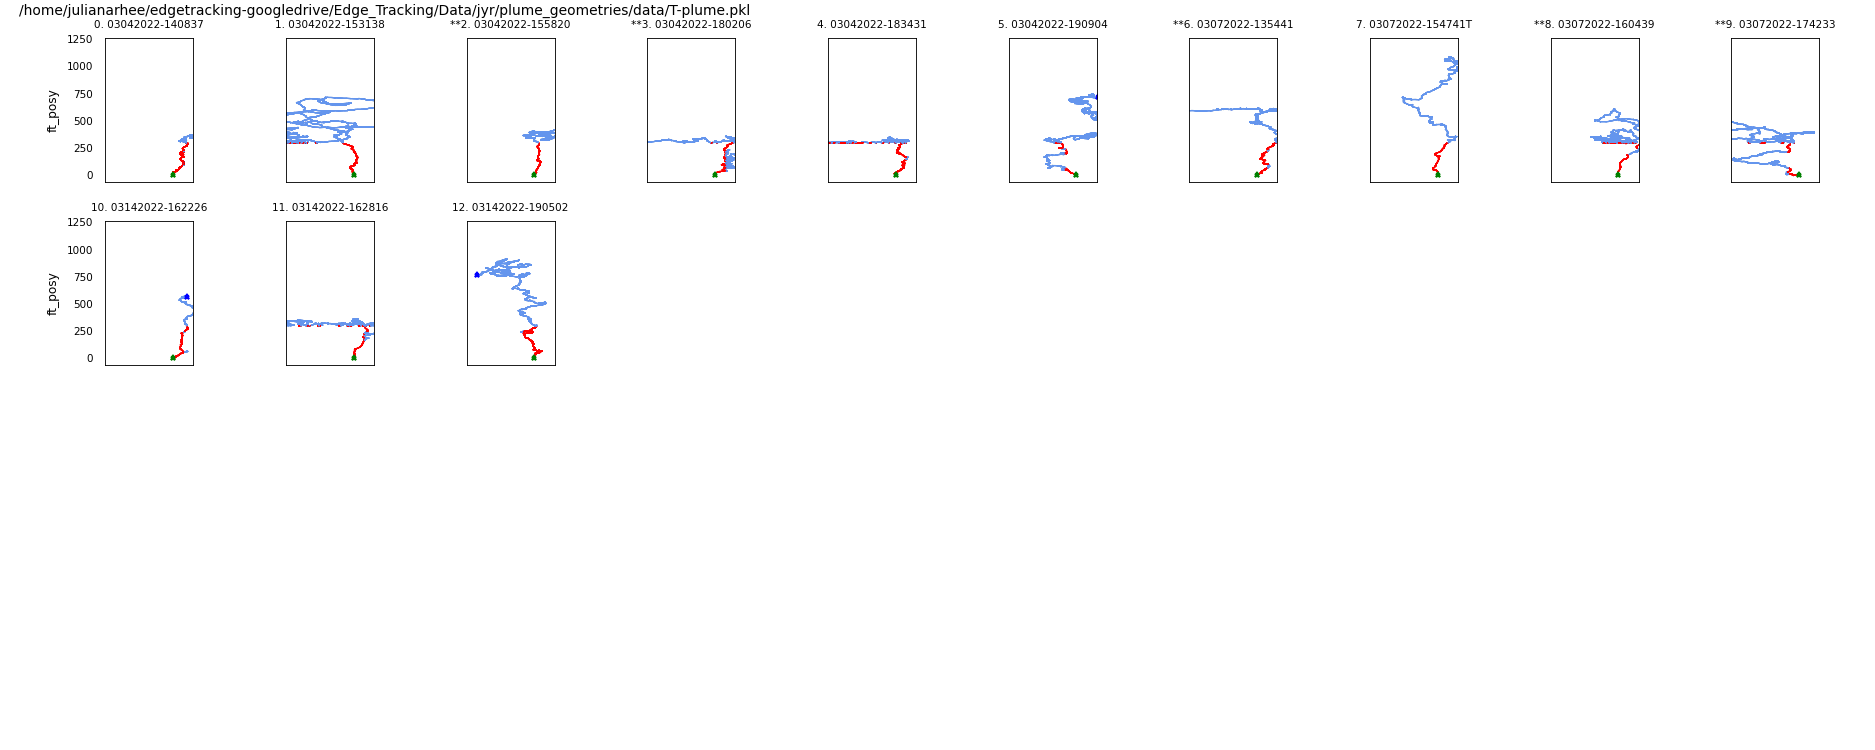

In [305]:
#putil.plot_array_of_trajectories(df, nr=3, nc=4, title='fly_id')
nr=4 #2
nc=10 #9 #7
fig, axn = pl.subplots(nr, nc, figsize=(nc*1.5,6), sharex=True, sharey=True)
for fi, fn in file_lut.items(): #fi, (fn, df_) in enumerate(df.groupby('filename')):
    df_ = df_zero[df_zero['filename']==fn].copy()
    ax=axn.flat[fi]
    butil.plot_trajectory(df_, ax =ax, palette=instrip_palette)
    ax.set_aspect(0.25)
    ax.legend_.remove()
    if fn in ets:
        title='**{}. {}'.format(fi, fn.split('_')[0])
    else:
        title='{}. {}'.format(fi, fn.split('_')[0])
    ax.set_title(title, fontsize=6)
for i in np.arange(fi+1, nr*nc):
    ax=axn.flat[i]
    ax.axis('off')
pl.tight_layout()
# label and save
util.label_figure(fig, figid)
pl.savefig(os.path.join(figdir, 'trajectories_{}.png'.format(experiment)))

In [306]:
# CHECK
# fn = [f for f in file_lut.values() if f.startswith('08252020-0123')][0]
# df_ = df0_all[df0_all['filename']==fn].copy()

# odor_bounds = butil.find_strip_borders(df_, strip_angle=45,
#                                         entry_ix=df_[df_['instrip']].iloc[0].name,
#                                         strip_width=strip_width, strip_sep=strip_sep)
# et_bouts, et_boutstats, et_passkey = traj.find_et_bouts(df_,
#                                     odor_bounds, strip_width=strip_width, strip_sep=strip_sep, 
#                                     max_instrip_upwind_percent=max_instrip_upwind_percent, 
#                                     max_crossovers=max_crossovers, 
#                                     max_crossover_to_dist_ratio=max_crossover_to_dist_ratio,
#                                     min_outside_bouts=min_outside_bouts,
#                                         min_global_upwind_dist=min_global_upwind_dist)

In [309]:

print(len(ets))
etdf_zero = df_zero[df_zero['filename'].isin(ets)].copy()
print("{} of {} trajectories are ET.".format(etdf_zero['filename'].nunique(), df_zero['filename'].nunique()))

6
6 of 13 trajectories are ET.


In [310]:
instrip_palette={True: 'r', False: 'cornflowerblue'}

In [311]:
importlib.reload(putil)

<module 'plotting' from '/home/julianarhee/Repositories/plume-tracking/plotting.py'>

<IPython.core.display.Javascript object>


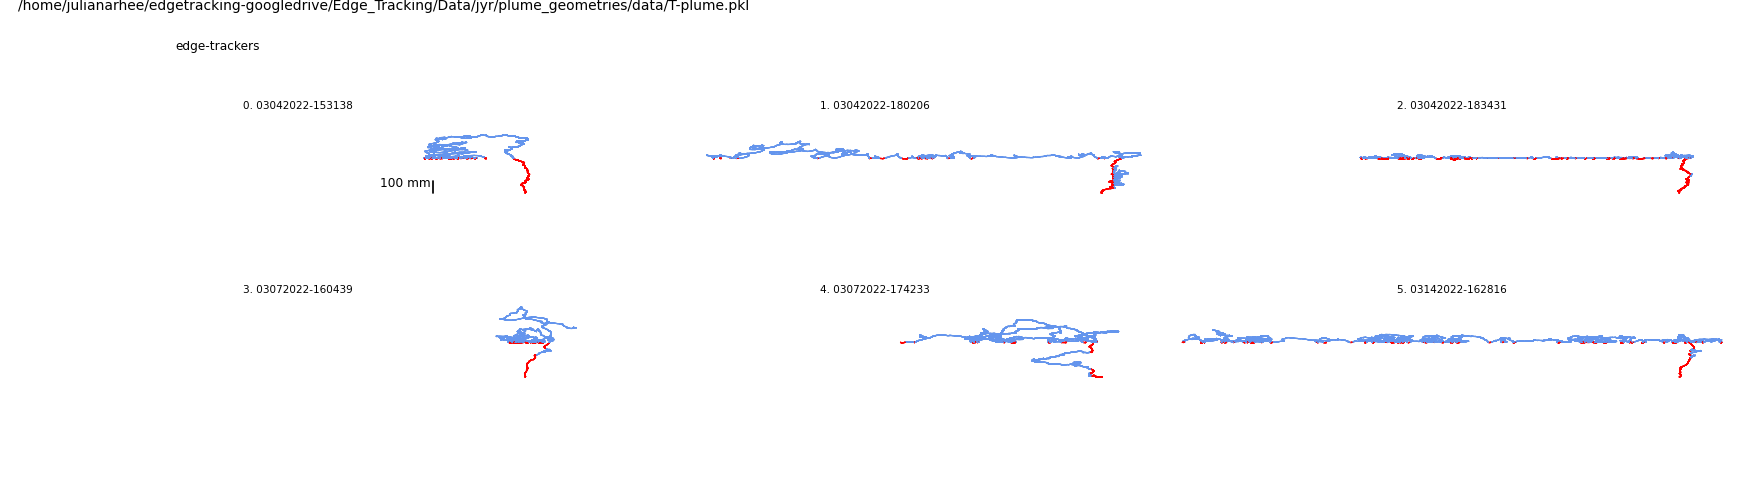

In [312]:
#putil.plot_array_of_trajectories(df, nr=3, nc=4, title='fly_id')
nr=2 #2
nc=3 #8 #6
fig, axn = pl.subplots(nr, nc, figsize=(14,4), sharex=True, sharey=True)
for fi, (fn, df_) in enumerate(etdf_zero.groupby('filename')):
    ax=axn.flat[fi]
    last_outbout = df_[df_['instrip']]['boutnum'].max()

    butil.plot_trajectory(df_[df_['boutnum']<=last_outbout], ax =ax, palette=instrip_palette, plot_start=False)
    ax.set_aspect(0.25)
    ax.legend_.remove()
    title='{}. {}'.format(fi, fn.split('_')[0])
    ax.set_title(title, fontsize=6)
    ax.axis('off')
    if fi==0:
        leg_xpos = -200; leg_ypos=0; leg_scale=100;
        putil.vertical_scalebar(ax, leg_xpos=leg_xpos, leg_ypos=leg_ypos, fontsize=7, color=bg_color)

for i in np.arange(fi+1, nr*nc):
    ax=axn.flat[i]
    ax.axis('off')
pl.tight_layout()
fig.text(0.1, 0.9, 'edge-trackers', fontsize=7)
util.label_figure(fig, figid)

pl.savefig(os.path.join(figdir, 'trajectories-ETs_{}{}.png'.format(experiment, plot_st)))

# split in odor, inbound, outbound

In [313]:
boutdir_palette = {'inodor': bg_color, 'inbound': 'c', 'outbound': 'm'}
smooth_window=11
rdp_epsilon=1

In [314]:
xvar='ft_posx'
yvar='ft_posy'
for fn, df_ in etdf_zero.groupby('filename'):
    last_outbout = df_[~df_['instrip']]['boutnum'].max()
    max_boutnum = df_['boutnum'].max()
    skip_last_bout = last_outbout==max_boutnum
    df_['boutdir'] = None
    df_.loc[df_['instrip'], 'boutdir'] = 'inodor'
    for bnum, bdf in df_[~df_['instrip']].groupby('boutnum'):
        max_ix = np.argmax(bdf[yvar])
        if max_ix==0: # this bout is flipped out to negative side, do flipLR
            bdf['ft_posx'], bdf['ft_posy'] = util.fliplr_coordinates(bdf['ft_posx'].values, \
                                             bdf['ft_posy'].values)
            max_ix = np.argmax(bdf[yvar])
        min_ix = np.argmin(bdf[yvar])
        #maxdist_x = bdf.iloc[max_ix][xvar] - bdf.iloc[min_ix][xvar]
        first_ix = bdf.iloc[0].name
        last_ix = bdf.iloc[-1].name
        mid_ix = bdf.iloc[max_ix].name
        df_.loc[first_ix:mid_ix, 'boutdir'] = 'outbound'
        df_.loc[mid_ix:last_ix, 'boutdir'] = 'inbound'
        
    df_ = butil.smooth_traces(df_)
    df_ = butil.add_rdp_by_bout(df_, epsilon=rdp_epsilon, xvar=xvar, yvar=yvar)

    etdf_zero.loc[etdf_zero['filename']==fn, 'boutdir'] = df_['boutdir'].values
    etdf_zero.loc[etdf_zero['filename']==fn, 'rdp_{}'.format(xvar)] = df_['rdp_{}'.format(xvar)].values
    etdf_zero.loc[etdf_zero['filename']==fn, 'rdp_{}'.format(yvar)] = df_['rdp_{}'.format(yvar)].values

In [315]:
if experiment=='T-plume':
    odor_angle = np.deg2rad(90)
else:
    deg = int(experiment.split('-')[0])
    print(deg)
    odor_angle = np.deg2rad(deg)

In [316]:
etdf_zero['odor_heading'] = etdf_zero['ft_heading'] + odor_angle #np.pi/2
p = util.unwrap_and_constrain_angles(etdf_zero['odor_heading'].values)
etdf_zero['odor_heading'] = p #-p 

In [317]:
etdf_zero.shape

(243631, 38)

#### plot example

03042022-153138_T_plume_Fly2_T1.log


<IPython.core.display.Javascript object>


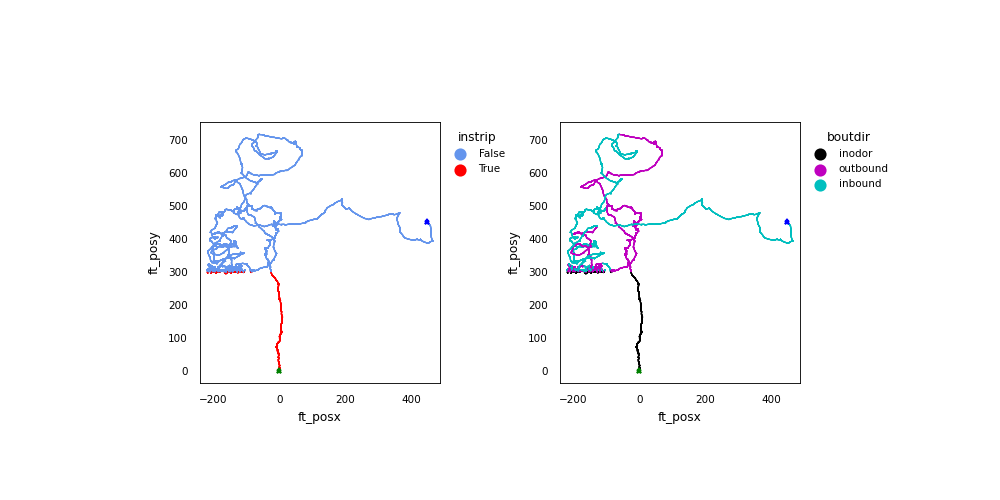

In [318]:
fn = file_lut[1]
print(fn)
df_ = etdf_zero[etdf_zero['filename']==fn].copy()
fig, axn = pl.subplots(1, 2, figsize=(8,4))
butil.plot_trajectory(df_, ax=axn[0], palette=instrip_palette)
butil.plot_trajectory(df_, hue_varname='boutdir', palette=boutdir_palette, ax=axn[1])
pl.subplots_adjust(wspace=0.5)
for ax in axn:
    ax.set_aspect(1)

In [319]:
if experiment=='T_plume':
    y_thresh = 300 - strip_width/2 
elif experiment in ['0-curated', '0-degree']:
    y_thresh = 0
else:
    y_thresh = etdf_zero['ft_posy'].min()
print(y_thresh)
d_ = df_[df_['ft_posy']>=y_thresh].copy()
d_.head()

-1.0849503249447006


,mfc1_stpt,mfc2_stpt,mfc3_stpt,led1_stpt,led2_stpt,sig_status,ft_posx,ft_posy,ft_frame,ft_error,...,upwind_dist,crosswind_dist,fly_id,condition,experiment,flipped,boutdir,rdp_ft_posx,rdp_ft_posy,odor_heading
115876,0.2,0.05,0.0,0.0,0.0,0,0.000000,0.000000,3684,5609.343973,...,0.141716,0.003990,1,t_plume,T-plume,False,inodor,True,True,1.775005
115877,0.2,0.05,0.0,0.0,0.0,0,0.048269,0.140819,3685,5544.065099,...,0.140819,0.048269,1,t_plume,T-plume,False,inodor,False,False,1.779682
115878,0.2,0.05,0.0,0.0,0.0,1,0.170035,0.310660,3687,5553.109618,...,0.169841,0.121766,1,t_plume,T-plume,False,inodor,False,False,1.797619
115879,0.2,0.05,0.0,0.0,0.0,0,0.271283,0.525135,3689,5724.605208,...,0.214475,0.101248,1,t_plume,T-plume,False,inodor,False,False,1.801593
115880,0.2,0.05,0.0,0.0,0.0,0,0.389648,0.752803,3691,6177.342293,...,0.227668,0.118366,1,t_plume,T-plume,False,inodor,False,False,1.797947


In [320]:
# d_['odor_heading'] = d_['ft_heading'] - np.pi/2
#p = util.unwrap_and_constrain_angles(d_['odor_heading'].values)
#d_['odor_heading'] = p #-p 

<IPython.core.display.Javascript object>


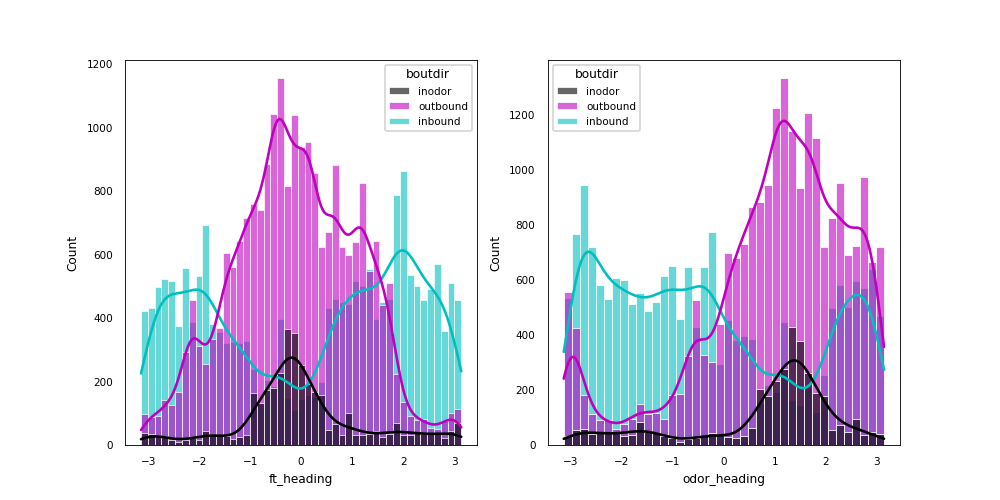

<AxesSubplot: xlabel='odor_heading', ylabel='Count'>

In [321]:
fig, axn = pl.subplots(1, 2, figsize=(8,4))
sns.histplot(data=d_, x='ft_heading', hue='boutdir', palette=boutdir_palette, ax=axn[0], alpha=0.6, 
             element='bars', kde=True) 
sns.histplot(data=d_, x='odor_heading', hue='boutdir', palette=boutdir_palette, ax=axn[1], alpha=0.6, 
             element='bars', kde=True) #fill=False)

In [322]:
curr_figdir = os.path.join(figdir, 'by-individual')
if not os.path.exists(curr_figdir):
    os.makedirs(curr_figdir)
print(curr_figdir)

/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/plume_geometries/figures/T-plume/by-individual


<IPython.core.display.Javascript object>


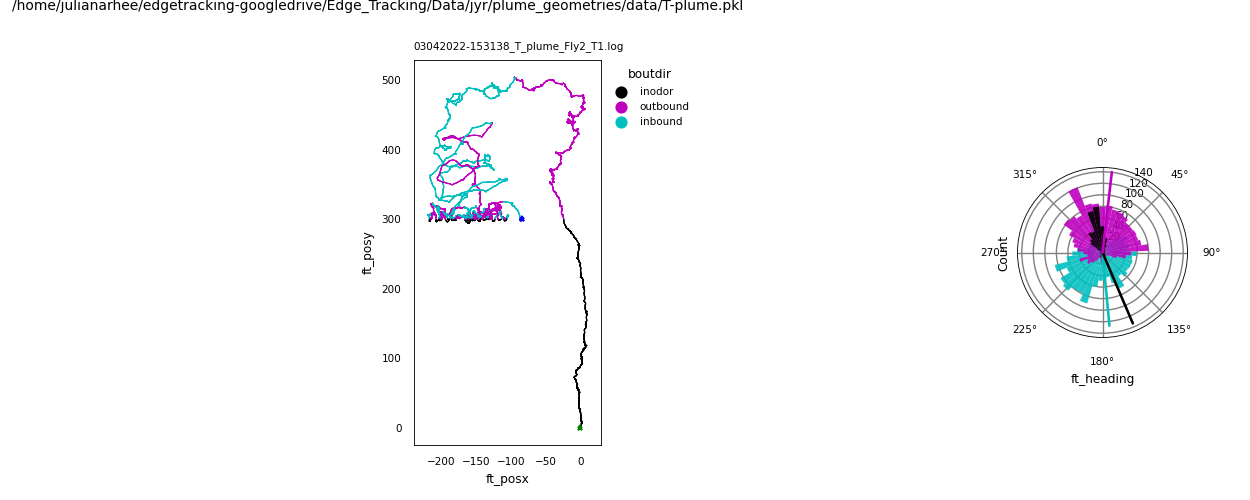

<IPython.core.display.Javascript object>


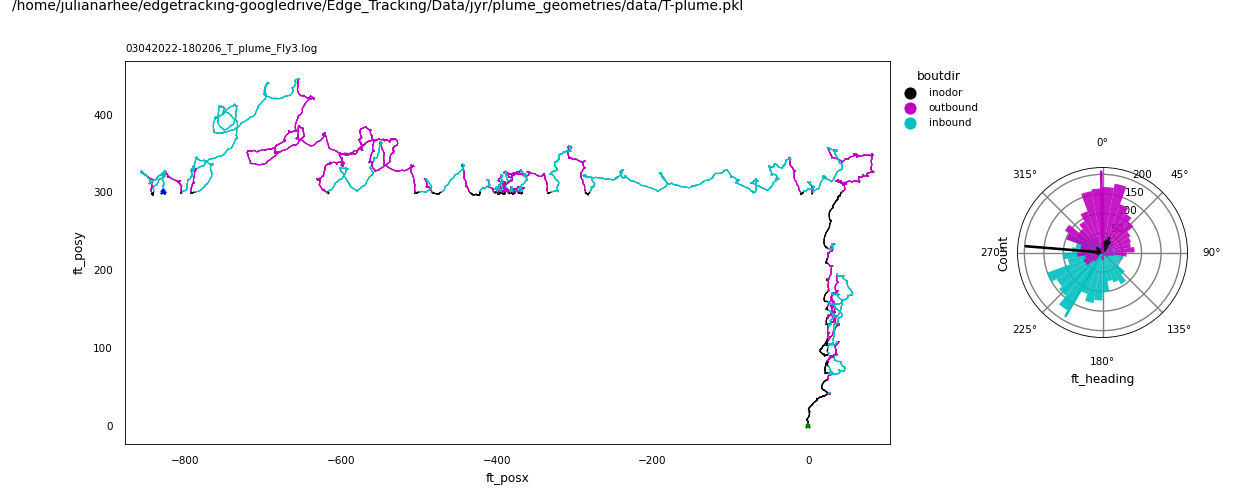

<IPython.core.display.Javascript object>


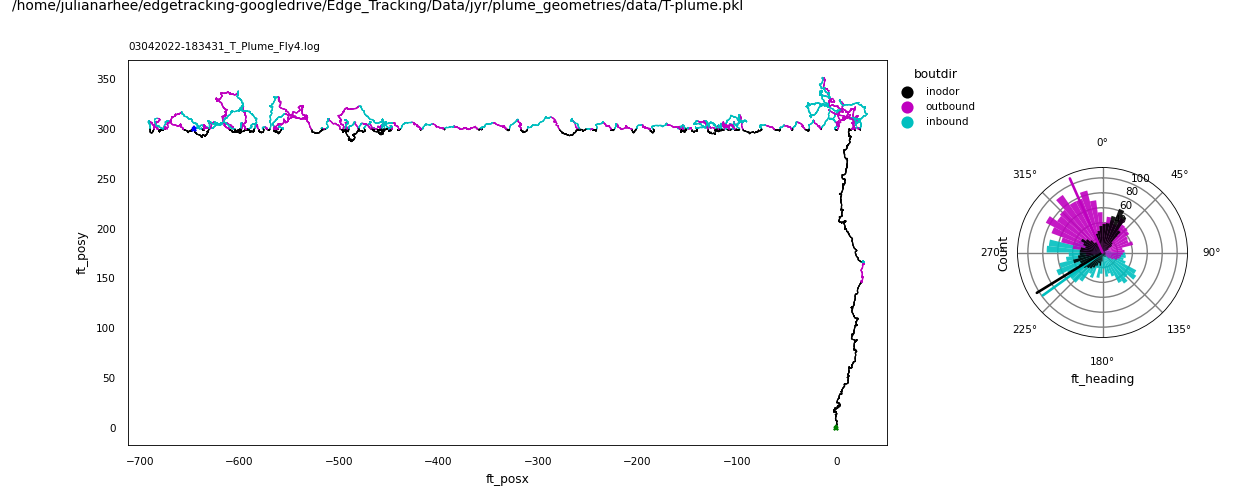

<IPython.core.display.Javascript object>


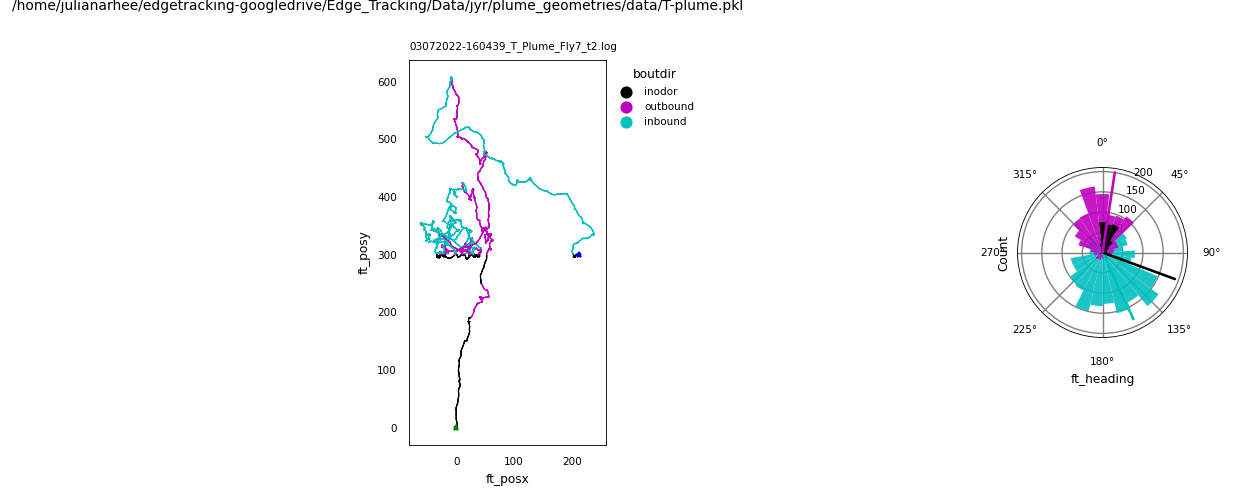

<IPython.core.display.Javascript object>


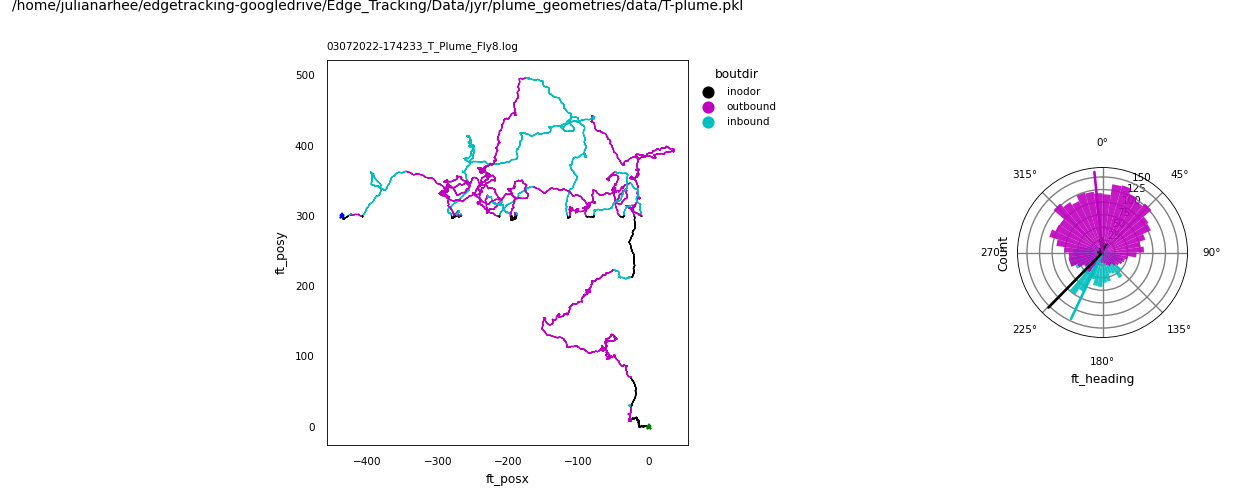

<IPython.core.display.Javascript object>


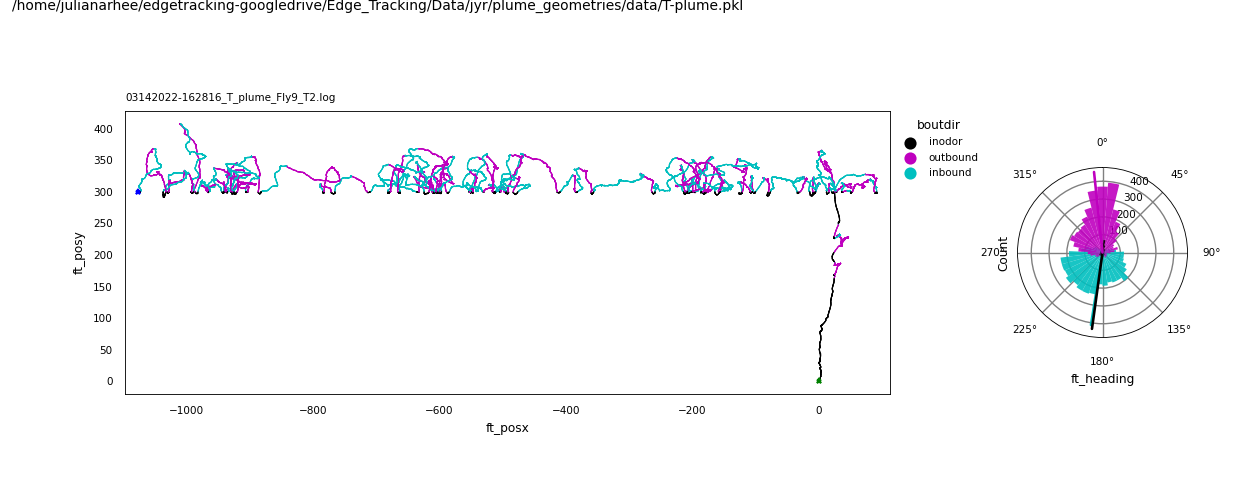

In [323]:
if experiment=='T_plume':
    y_thresh = 300 - strip_width/2 
elif experiment in ['0-curated', '0-degree']:
    y_thresh = 0
else:
    y_thresh = etdf_zero['ft_posy'].min()
hist_var = 'ft_heading'
weights_var = 'euclid_dist'
bin_method='fd'

for fn, df_ in etdf_zero.groupby('filename'):
    fig = pl.figure(figsize=(10,4))
    gs = mpl.gridspec.GridSpec(1,4)
    ax = fig.add_subplot(gs[0, 0:3])
    # remove last bout
    last_bout = df_[df_['instrip']]['boutnum'].max()
    d_ = df_[(df_['ft_posy']>=y_thresh) & (df_['boutnum']<=last_bout)].copy()
    # plot trajectory
    butil.plot_trajectory(d_, hue_varname='boutdir', palette=boutdir_palette, ax=ax)
    ax.set_title(fn, loc='left', fontsize=6)
    ax.set_aspect(1)
    # ax.legend(bbox_to_anchor=(1,1), loc='lower right')
    ax = fig.add_subplot(gs[0, 3], projection='polar') #pl.subplot(122, projection='polar')
    ax = sns.histplot(data=d_, bins=bin_method, x=hist_var, ax=ax, hue='boutdir', 
                     palette=boutdir_palette, alpha=0.9, common_norm=False, weights=weights_var)
#     for (boutnum, boutdir), bdf in d_.groupby(['boutnum', 'boutdir']):
#         weighted_avg = util.get_weighted_average(bdf, #bdf[bdf['boutdir']==boutdir], 
#                                             hist_var=hist_var, weights_var=weights_var, is_circular=True)
#         ax.plot([0, weighted_avg], [0, ax.get_ylim()[-1]], boutdir_palette[boutdir]) # theta is x
    # plot average
    avg_ = d_.groupby(['boutnum', 'boutdir'], as_index=False).apply(util.get_weighted_average, \
                hist_var=hist_var, weights_var=weights_var, is_circular=True).rename(columns={None: hist_var})
    for boutdir, bdf in avg_.groupby('boutdir'):
        weighted_avg = util.circular_mean(bdf[hist_var])
        ax.plot([0, weighted_avg], [0, ax.get_ylim()[-1]], boutdir_palette[boutdir]) # theta is x
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.legend_.remove() 
    # save
    pl.subplots_adjust(left=0.1, right=0.95, wspace=0.75)
    util.label_figure(fig, figid)
    pl.savefig(os.path.join(curr_figdir, '{}.png'.format(fn)))


In [325]:
n_files = etdf_zero['filename'].nunique()
print(n_files)

6


In [326]:
curr_figdir

'/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/plume_geometries/figures/T-plume/by-individual'

<IPython.core.display.Javascript object>


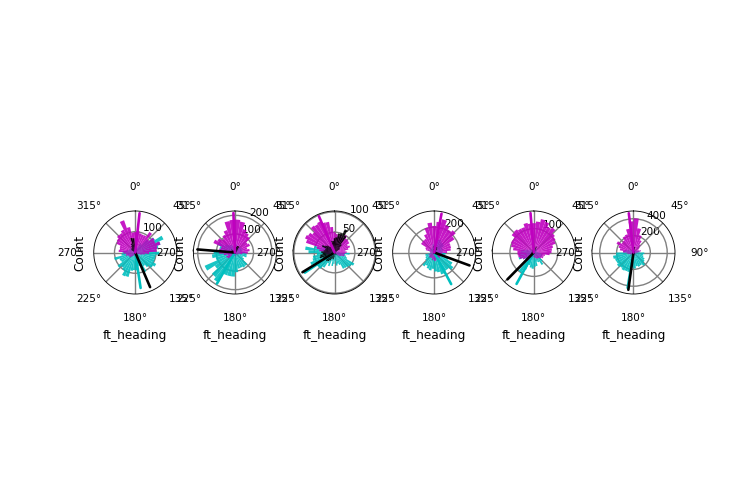

In [327]:
hist_var='ft_heading'
weights_var = 'euclid_dist'
nr=1
nc=6

n_files = etdf_zero['filename'].nunique()
fig, axn  = pl.subplots(nr, nc, subplot_kw=dict(polar=True))
for fi, (fn, df_) in enumerate(etdf_zero.groupby('filename')):
    d_ = df_[df_['ft_posy']>=y_thresh].copy()

    avg_ = d_.groupby(['boutnum', 'boutdir'], as_index=False).apply(util.get_weighted_average, \
                hist_var=hist_var, weights_var=weights_var, is_circular=True).rename(columns={None: hist_var})
    
    ax = axn.flat[fi]
    sns.histplot(data=d_, bins=bin_method, x=hist_var, ax=ax, hue='boutdir', 
                 palette=boutdir_palette, alpha=0.9, common_norm=False, weights=weights_var)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.legend_.remove() #sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1,1))
#     for boutdir, bdf in d_.groupby('boutdir'):
#         weighted_avg = util.get_weighted_average(bdf[bdf['boutdir']==boutdir], 
#                                             hist_var=hist_var, weights_var=weights_var, is_circular=True)
#         ax.plot([0, weighted_avg], [0, ax.get_ylim()[-1]], boutdir_palette[boutdir]) # theta is x
    for boutdir, bdf in avg_.groupby('boutdir'):
        weighted_avg = util.circular_mean(bdf[hist_var])
        ax.plot([0, weighted_avg], [0, ax.get_ylim()[-1]], boutdir_palette[boutdir]) # theta is x
        

In [328]:
if experiment=='T-plume':
    y_thresh = 300 - strip_width/2 
elif experiment in ['0-curated', '0-degree']:
    y_thresh = 0
else:
    y_thresh = etdf_zero['ft_posy'].min()
b_list = []
for fn, df_ in etdf_zero.groupby('filename'):
    last_bout = df_[df_['instrip']]['boutnum'].max()
    first_bout = df_[df_['instrip']]['boutnum'].min()+1
    d_ = df_[(df_['ft_posy']>=y_thresh) 
             & (df_['boutnum']<=last_bout)
            & (df_['boutnum']>=first_bout)].copy()

    avg1_ = d_.groupby(['boutnum', 'instrip', 'boutdir'], as_index=False).apply(util.get_weighted_average, \
                    hist_var='ft_heading', weights_var=weights_var, is_circular=True).rename(columns={None: 'ft_heading'})
    avg2_ = d_.groupby(['boutnum', 'instrip', 'boutdir'], as_index=False).apply(util.get_weighted_average, \
                    hist_var='odor_heading', weights_var=weights_var, is_circular=True).rename(columns={None: 'odor_heading'})
    avg_ = pd.merge(avg1_, avg2_, on=['boutnum', 'instrip', 'boutdir'])
    dist_ = d_.groupby(['boutnum', 'instrip', 'boutdir'], as_index=False).apply(util.get_euclid_distance).rename(columns={None: weights_var})

    boutdf = pd.merge(avg_, dist_, on=['boutnum', 'instrip', 'boutdir'])
    boutdf['filename'] = fn
    b_list.append(boutdf)
boutdf = pd.concat(b_list).reset_index(drop=True)

# average heading

<IPython.core.display.Javascript object>


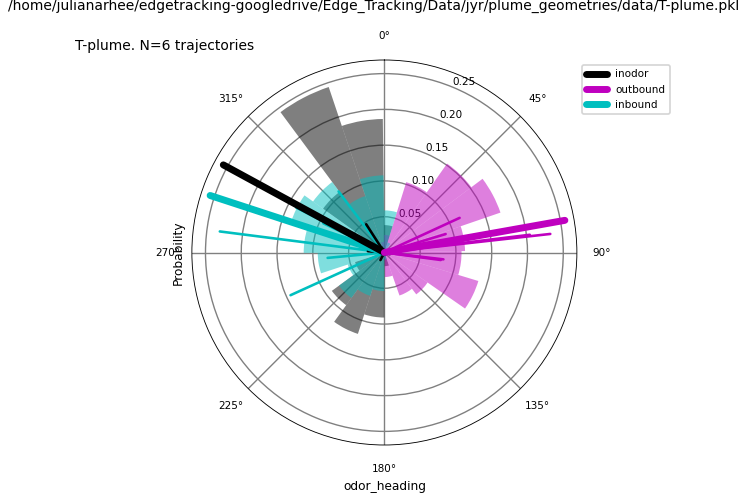

/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/plume_geometries/figures/T-plume/odor_heading_avg-fly_polar_T-plume_yt.svg


In [331]:
fig, ax  = pl.subplots(subplot_kw=dict(polar=True))
hist_var = 'odor_heading'
# histogram of ALL bouts across all flies

sns.histplot(data=boutdf, x=hist_var, hue='boutdir', ax=ax, palette=boutdir_palette, 
             edgecolor='none', stat='probability', common_norm=False, bins=20)
# each fly's average
# each fly's average
b_list = []
for fn, df_ in boutdf.groupby('filename'):
    last_bout = df_[df_['instrip']]['boutnum'].max()
    d_ = df_[(df_['boutnum']<=last_bout)].copy()
    maxdist = d_['euclid_dist'].max()
    for bdir, fl_ in d_.groupby('boutdir'):
        # get average
        heading_ = util.circular_mean(fl_[hist_var])
        # scale by dist
        dist_ = fl_['euclid_dist'].mean() / maxdist
        # plot animal's average
        ax.plot([0, heading_], [0, dist_], color=boutdir_palette[bdir], label=bdir) # theta is x
# plot average across flies
ylim = ax.get_ylim()[-1]
for boutdir, bdf in boutdf.groupby('boutdir'):
    weighted_avg = util.circular_mean(bdf[hist_var])
    dist = bdf[weights_var].mean()
    ax.plot([0, weighted_avg], [0, ylim], color=boutdir_palette[boutdir], lw=4) # theta is x
        
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
labels=['inodor', 'outbound', 'inbound']
colors=[boutdir_palette[v] for v in labels]
legh = putil.custom_legend(labels=labels, colors=colors) #, instrip_palette[False]])
ax.legend(handles=legh, bbox_to_anchor=(1,1), loc='upper left')

n_filenames = boutdf['filename'].nunique()
fig.text(0.1, 0.9, '{}. N={} trajectories'.format(experiment, n_filenames), fontsize=8)

util.label_figure(fig, figid)
figname = '{}_avg-fly_polar'.format(hist_var)
pl.savefig(os.path.join(figdir, '{}_{}{}.svg'.format(figname, experiment, plot_st)))
pl.savefig(os.path.join(figdir, '{}_{}{}.png'.format(figname, experiment, plot_st)))
print(os.path.join(figdir, '{}_{}{}.svg'.format(figname, experiment, plot_st)))

In [332]:
boutdf['euclid_dist'].max()

995.0004398998105

In [333]:
boutdir_palette = {'inodor': [0.3]*3, 'inbound': 'c', 'outbound': 'm'}

<IPython.core.display.Javascript object>


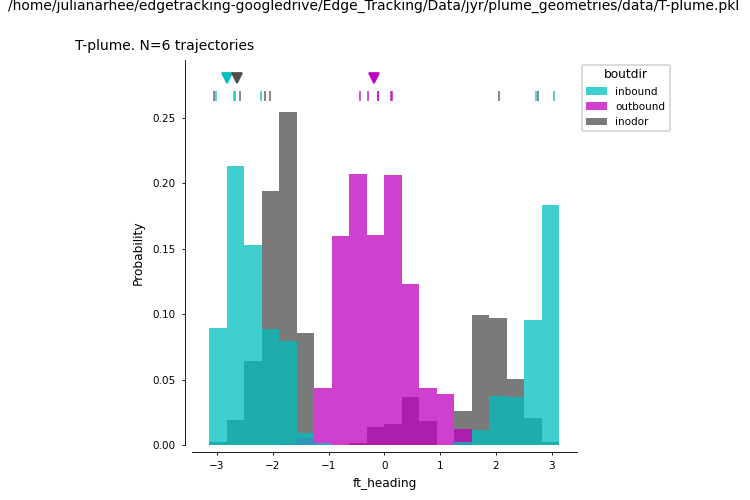

/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/plume_geometries/figures/T-plume/ft_heading_avg-fly_lin_T-plume_yt.svg


In [335]:
hist_var='ft_heading'
weights_var = 'euclid_dist'
ylim = 0.23
avg_marker = 'v'
fly_marker = '|'
alpha=0.75

fig, ax  = pl.subplots(subplot_kw=dict(polar=False))
# plot distn of bouts
sns.histplot(data=boutdf, bins=20, x=hist_var, ax=ax, hue='boutdir', 
             palette=boutdir_palette, alpha=alpha, edgecolor='none', common_norm=False, weights=weights_var, stat='probability')
# plot EACH fly's avg
ylim = ax.get_ylim()[-1]
for fi, (fn, df_) in enumerate(boutdf.groupby('filename')):
    for boutdir, bdf in df_.groupby('boutdir'):
        weighted_avg = util.circular_mean(bdf[hist_var])
        dist = bdf[weights_var].mean()
        ax.plot([weighted_avg], [ylim], marker=fly_marker, alpha=alpha, color=boutdir_palette[boutdir]) # theta is x
# plot average across flies
ylim = ax.get_ylim()[-1]
for boutdir, bdf in boutdf.groupby('boutdir'):
    weighted_avg = util.circular_mean(bdf[hist_var])
    dist = bdf[weights_var].mean()
    ax.plot([weighted_avg], [ylim], marker=avg_marker, color=boutdir_palette[boutdir], lw=4) # theta is x
# legend
sns.move_legend(ax, bbox_to_anchor=(1,1), loc='upper left')
# ticks
ax.set_box_aspect(1)
ax.tick_params(which='both', axis='both', length=2, width=0.5, color='k',
               direction='out', left=True, bottom=True)
sns.despine(offset=4)
# label
n_filenames = boutdf['filename'].nunique()
fig.text(0.1, 0.9, '{}. N={} trajectories'.format(experiment, n_filenames), fontsize=8)
util.label_figure(fig, figid)
# save
figname = '{}_avg-fly_lin'.format(hist_var)
pl.savefig(os.path.join(figdir, '{}_{}{}.svg'.format(figname, experiment, plot_st)))
pl.savefig(os.path.join(figdir, '{}_{}{}.png'.format(figname, experiment, plot_st)))
print(os.path.join(figdir, '{}_{}{}.svg'.format(figname, experiment, plot_st)))

# RDP and angles of entry/exit

In [336]:
etdf_zero = etdf_zero.groupby(['filename', 'boutnum'], as_index=False).apply(butil.rdp_to_heading)

/tmp/ipykernel_1496107/796669394.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  etdf_zero = etdf_zero.groupby(['filename', 'boutnum'], as_index=False).apply(butil.rdp_to_heading)


03042022-153138_T_plume_Fly2_T1.log


<IPython.core.display.Javascript object>


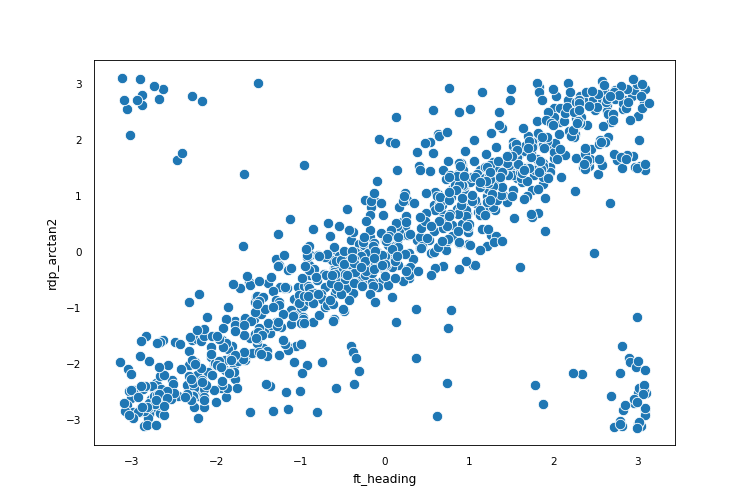

<AxesSubplot: xlabel='ft_heading', ylabel='rdp_arctan2'>

In [337]:
fn = file_lut[1]
print(fn)
df_ = etdf_zero[etdf_zero['filename']==fn].copy()
fig, ax = pl.subplots()
sns.scatterplot(data=df_, x='ft_heading', y='rdp_arctan2')

In [338]:
firstlast = etdf_zero[etdf_zero['rdp_ft_posx']].groupby(['filename', 'boutnum']).agg(['first', 'last']).stack().reset_index().rename(columns={'level_2': 'order'})
firstlast['filename'].nunique()

6

# save et df

In [339]:
etdir = os.path.join(srcdir, 'ets')
if not os.path.exists(etdir):
    os.makedirs(etdir)
    
et_fpath = os.path.join(etdir, 'et_{}.pkl'.format(experiment))
with open(et_fpath, 'wb') as f:
    pkl.dump({'etdf_zero': etdf_zero,
              'boutdf': boutdf,
              'firstlast': firstlast}, f)
print(et_fpath)

/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/plume_geometries/data/ets/et_T-plume.pkl


# plot entry/exit

<IPython.core.display.Javascript object>


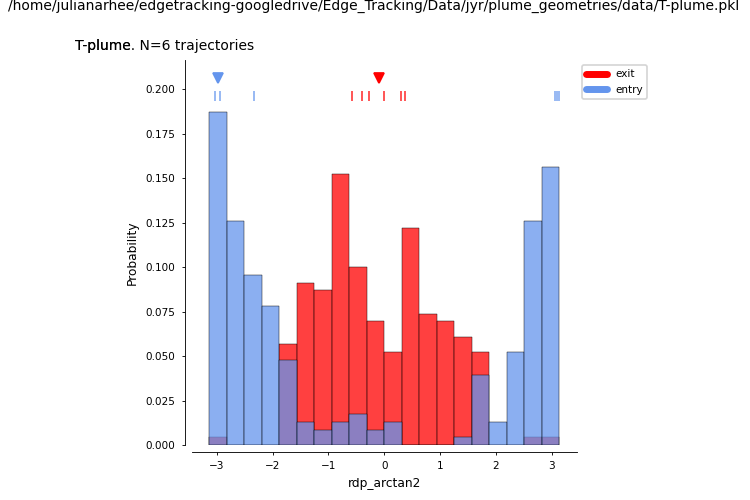

6
/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/plume_geometries/figures/T-plume/rdp_arctan2_avg-fly_lin_T-plume_yt.svg


In [340]:
hist_var = 'rdp_arctan2'
weights_var='euclid_dist'
ylim = 0.23
avg_marker = 'v'
fly_marker = '|'
alpha=0.75

# Get entries & exits only
firstlast = etdf_zero[etdf_zero['rdp_ft_posx']].groupby(['filename', 'boutnum']).agg(['first', 'last']).stack().reset_index().rename(columns={'level_2': 'order'})
entries_exits = firstlast[firstlast['order']=='last'].copy()

fig, ax  = pl.subplots(subplot_kw=dict(polar=False))
# histogram of ALL bouts across all flies
sns.histplot(data=entries_exits, x=hist_var, hue='instrip', ax=ax, palette=instrip_palette, 
             edgecolor='k', lw=0.25, alpha=alpha, stat='probability', common_norm=False, bins=20)
# plot each fly's average
ylim = ax.get_ylim()[-1]
b_list = []
for fn, df_ in etdf_zero.groupby('filename'):
    last_bout = df_[df_['instrip']]['boutnum'].max()
    d_ = df_[(df_['ft_posy']>=y_thresh) & (df_['boutnum']<=last_bout)].copy()
    # get first/last
    firstlast_ = firstlast[firstlast['filename']==fn].copy() #d_[d_['rdp_ft_posx']].groupby('boutnum').agg(['first', 'last']).stack().reset_index().rename(columns={'level_1': 'order'})
    # get average
    avg_exit = util.circular_mean(firstlast_[ (firstlast_['instrip']) & (firstlast_['order']=='last')][hist_var])
    avg_entry = util.circular_mean(firstlast_[ (~firstlast_['instrip']) & (firstlast_['order']=='last')][hist_var])
    # scale by dist
    dist_exit = firstlast_[ (firstlast_['instrip']) & (firstlast_['order']=='last')][weights_var].mean()
    dist_entry = firstlast_[ (~firstlast_['instrip']) & (firstlast_['order']=='last')][weights_var].mean()
    # plot animal's average
    ax.plot([avg_exit], [ylim], marker=fly_marker, alpha=alpha, color=instrip_palette[True], label='exit') # theta is x
    ax.plot([avg_entry], [ylim], marker=fly_marker, alpha=alpha, color=instrip_palette[False], label='entry') # theta is x
# average of all flies
avg_exit = util.circular_mean(entries_exits[entries_exits['instrip']].groupby('filename')[hist_var].apply(util.circular_mean))
avg_entry = util.circular_mean(entries_exits[~entries_exits['instrip']].groupby('filename')[hist_var].apply(util.circular_mean))
ylim = ax.get_ylim()[-1]
ax.plot([avg_exit], [ylim], marker=avg_marker, color=instrip_palette[True], lw=3, label='exit') # theta is x
ax.plot([avg_entry], [ylim], marker=avg_marker, color=instrip_palette[False], lw=3, label='entry') # theta is x
# ticks
# ticks
ax.set_box_aspect(1)
ax.tick_params(which='both', axis='both', length=2, width=0.5, color='k',
               direction='out', left=True, bottom=True)
sns.despine(offset=4)
# ax.set_theta_zero_location("N")
# ax.set_theta_direction(-1)
legh = putil.custom_legend(labels=['exit', 'entry'], colors=[instrip_palette[True], instrip_palette[False]])
ax.legend(handles=legh, bbox_to_anchor=(1,1), loc='upper left')
fig.text(0.1, 0.9, experiment, fontsize=8)

n_filenames = firstlast['filename'].nunique()
print(n_filenames)
fig.text(0.1, 0.9, '{}. N={} trajectories'.format(experiment, n_filenames), fontsize=8)

util.label_figure(fig, figid)
ax.set_box_aspect(1)

# save
figname = '{}_avg-fly_lin'.format(hist_var)
pl.savefig(os.path.join(figdir, '{}_{}{}.svg'.format(figname, experiment, plot_st)))
pl.savefig(os.path.join(figdir, '{}_{}{}.png'.format(figname, experiment, plot_st)))
print(os.path.join(figdir, '{}_{}{}.svg'.format(figname, experiment, plot_st)))


In [341]:
instrip_palette = {True: 'r', False: 'cornflowerblue'}

In [342]:
firstlast = etdf_zero[etdf_zero['rdp_ft_posx']].groupby(['filename', 'boutnum']).agg(['first', 'last']).stack().reset_index().rename(columns={'level_2': 'order'})
print(firstlast.shape, etdf_zero.shape)

(920, 40) (243631, 39)


In [343]:
# firstlast = d_[d_['rdp_ft_posx']].groupby('boutnum').agg(['first', 'last']).stack().reset_index().rename(columns={'level_1': 'order'})
avg_exit = util.circular_mean(firstlast[ (firstlast['instrip']) & (firstlast['order']=='last')]['rdp_arctan2'])
avg_entry = util.circular_mean(firstlast[ (~firstlast['instrip']) & (firstlast['order']=='last')]['rdp_arctan2'])

In [345]:
y_thresh

275.0

<IPython.core.display.Javascript object>


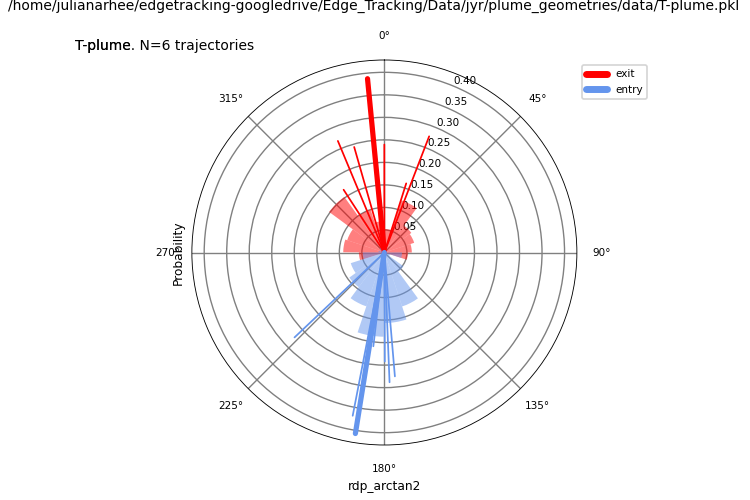

/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/plume_geometries/figures/T-plume/rdp_arctan2_avg-fly_polar_T-plume_yt.svg


In [344]:
fig, ax  = pl.subplots(subplot_kw=dict(polar=True))
hist_var = 'rdp_arctan2'
# histogram of ALL bouts across all flies
firstlast = etdf_zero[etdf_zero['rdp_ft_posx']].groupby(['filename', 'boutnum']).agg(['first', 'last']).stack().reset_index().rename(columns={'level_2': 'order'})
entries_exits = firstlast[firstlast['order']=='last'].copy()
sns.histplot(data=entries_exits, x=hist_var, hue='instrip', ax=ax, palette=instrip_palette, 
             edgecolor='none', stat='probability', common_norm=False, bins=20)
# each fly's average
b_list = []
for fn, df_ in etdf_zero.groupby('filename'):
    last_bout = df_[df_['instrip']]['boutnum'].max()
    d_ = df_[(df_['ft_posy']>=y_thresh) & (df_['boutnum']<=last_bout)].copy()
    # get first/last
    fl_ = firstlast[firstlast['filename']==fn].copy() #d_[d_['rdp_ft_posx']].groupby('boutnum').agg(['first', 'last']).stack().reset_index().rename(columns={'level_1': 'order'})
    # get average
    avg_exit = util.circular_mean(fl_[ (fl_['instrip']) & (fl_['order']=='last')][hist_var])
    avg_entry = util.circular_mean(fl_[ (~fl_['instrip']) & (fl_['order']=='last')][hist_var])
    # scale by dist
    dist_exit = fl_[ (fl_['instrip']) & (fl_['order']=='last')]['euclid_dist'].mean()
    dist_entry = fl_[ (~fl_['instrip']) & (fl_['order']=='last')]['euclid_dist'].mean()
    # plot animal's average
    ax.plot([0, avg_exit], [0, dist_exit], instrip_palette[True], lw=1, label='exit') # theta is x
    ax.plot([0, avg_entry], [0, dist_entry], instrip_palette[False], lw=1, label='entry') # theta is x
# average of all flies
avg_exit = util.circular_mean(entries_exits[entries_exits['instrip']].groupby('filename')[hist_var].apply(util.circular_mean))
avg_entry = util.circular_mean(entries_exits[~entries_exits['instrip']].groupby('filename')[hist_var].apply(util.circular_mean))
ax.plot([0, avg_exit], [0, ax.get_ylim()[-1]], instrip_palette[True], lw=3, label='exit') # theta is x
ax.plot([0, avg_entry], [0, ax.get_ylim()[-1]], instrip_palette[False], lw=3, label='entry') # theta is x

ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
legh = putil.custom_legend(labels=['exit', 'entry'], colors=[instrip_palette[True], instrip_palette[False]])

ax.legend(handles=legh, bbox_to_anchor=(1,1), loc='upper left')
fig.text(0.1, 0.9, experiment, fontsize=8)

n_filenames = firstlast['filename'].nunique()
fig.text(0.1, 0.9, '{}. N={} trajectories'.format(experiment, n_filenames), fontsize=8)

util.label_figure(fig, figid)

figname = '{}_avg-fly_polar'.format(hist_var)
pl.savefig(os.path.join(figdir, '{}_{}{}.svg'.format(figname, experiment, plot_st)))
pl.savefig(os.path.join(figdir, '{}_{}{}.png'.format(figname, experiment, plot_st)))
print(os.path.join(figdir, '{}_{}{}.svg'.format(figname, experiment, plot_st)))

# heatmaps

In [1187]:
import scipy as sp

In [1188]:
df = df0_all.copy()

max_nframes = df.groupby('filename')['ft_posy'].count().max()

d_list=[]
for fi, (fn, df_) in enumerate(df.groupby('filename')):
    #up_ = traj.upsample_bout_trajectories(df_, npoints=max_nframes)
    x = df_['ft_posx'].values
    y = df_['ft_posy'].values
    t = np.arange(len(df_))
    t_common = np.linspace(t[0], t[-1], max_nframes)
    fx = sp.interpolate.interp1d(t, x)
    fy = sp.interpolate.interp1d(t, y)

    interpx =fx(t_common)
    interpy = fy(t_common)
    d_ = pd.DataFrame({
        'ft_posx': interpx,
        'ft_posy': interpy,
        'filename': fn,
        'fly_id': fi
    })    
    d_list.append(d_)

updf = pd.concat(d_list, axis=0)
updf.groupby('filename').count()

,ft_posx,ft_posy,fly_id
filename,,,
08122020-192731_15degOdorRight,93832,93832,93832
08122020-194433_15degOdorLeft,93832,93832,93832
08122020-204827_15degOdorRight(animal stops frequently and for long periods),93832,93832,93832
08132020-014103_15degOdorRight,93832,93832,93832
"08132020-022753_15degOdorLeft(lossed tracking - suction may have been blocked, possible ACV buildup)",93832,93832,93832
08132020-025500_15degOdorLeftReinforced(lossed tracking),93832,93832,93832
08142020-204831_15degOdorRight(lossed tracking),93832,93832,93832
08142020-222909_15degOdorRight,93832,93832,93832
08152020-003127_15degOdorRight(lossed tracking),93832,93832,93832


<IPython.core.display.Javascript object>


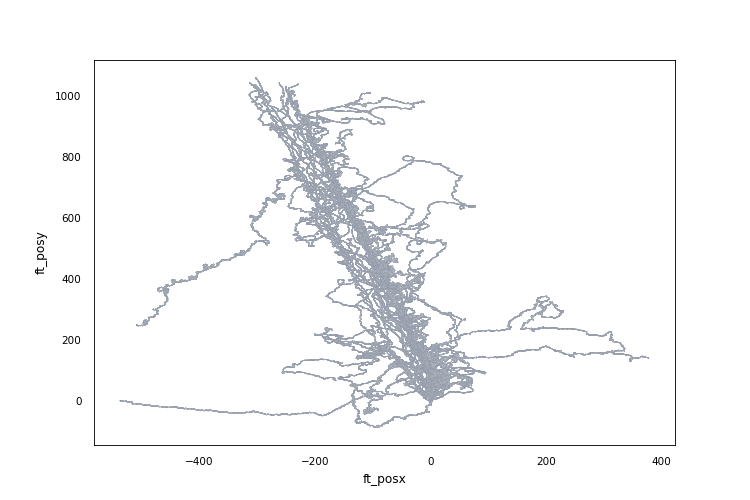

In [1189]:
fig, ax= pl.subplots()
for fn, df_ in df.groupby('filename'):
    sns.scatterplot(data=df_, x='ft_posx', y='ft_posy', s=0.3, color='w', ax=ax,
                   hue='fly_id', palette='bone', legend=0)

In [1192]:
importlib.reload(util)

<module 'utils' from '/home/julianarhee/Repositories/plume-tracking/utils.py'>

In [1193]:
# sns.set_style('white')
util.set_sns_style(style='white')
#util.set_sns_style(style='dark')


<IPython.core.display.Javascript object>


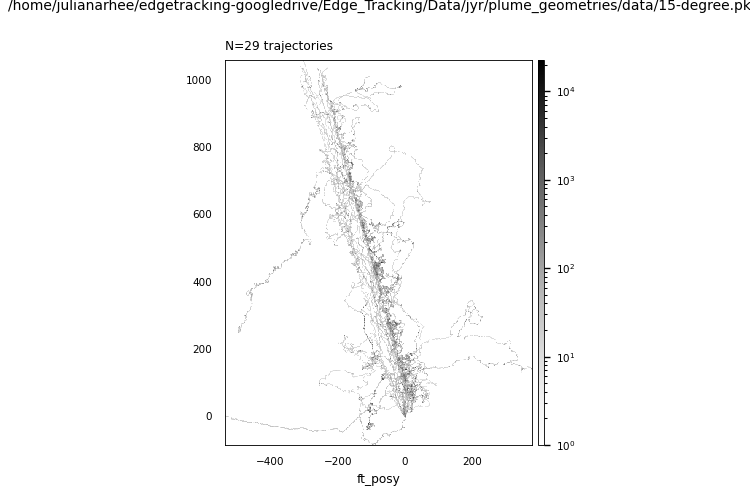

In [1194]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
cmap='Greys'

fig, ax = pl.subplots()
h, xe, ye, img = ax.hist2d(df['ft_posx'], df['ft_posy'], bins=500, norm=mpl.colors.LogNorm(), cmap=cmap)
ax.set_aspect(1)
# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.05, )
   
#fig.colorbar(img, ax=ax, fraction=0.046, pad=0.04)
n_files = df['filename'].nunique()
pl.colorbar(img, cax=cax)
ax.set_xlabel('ft_posx')
ax.set_xlabel('ft_posy')
ax.set_title('N={} trajectories'.format(n_files), loc='left')

util.label_figure(fig, figid)

figname = 'heatmap_{}'.format(experiment)
pl.savefig(os.path.join(figdir, '{}{}.png'.format(figname, plot_st)), dpi=300)
# pl.savefig(os.path.join(figdir, '{}.svg'.format(figname)))


In [1195]:
figdir

'/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/plume_geometries/figures/15-degree'

In [606]:
df.shape

(548349, 7)

In [607]:
d_list = []
for i, (xi, yi) in enumerate(zip(xe[0:-1], ye[0:-1])):
    startix, endix = xi, xe[i+1]
    curr_n_x = df[(df['ft_posx']>=startix) & (df['ft_posx']<endix)]['filename'].nunique()
    startix, endix = yi, ye[i+1]
    curr_n_y = df[(df['ft_posy']>=startix) & (df['ft_posy']<endix)]['filename'].nunique()
    
    d_ = pd.DataFrame({
        'edge': ['x', 'y'],
        'edge_value': [xi, yi],
        'n_flies': [curr_n_x, curr_n_y],
        'index': [i, i]
    }, index=[i, i])
    
    d_list.append(d_)
cnts = pd.concat(d_list).reset_index(drop=True)
    

In [610]:
cnts.max()

edge                    y
edge_value    1189.569773
n_flies                13
index                  99
dtype: object

<IPython.core.display.Javascript object>


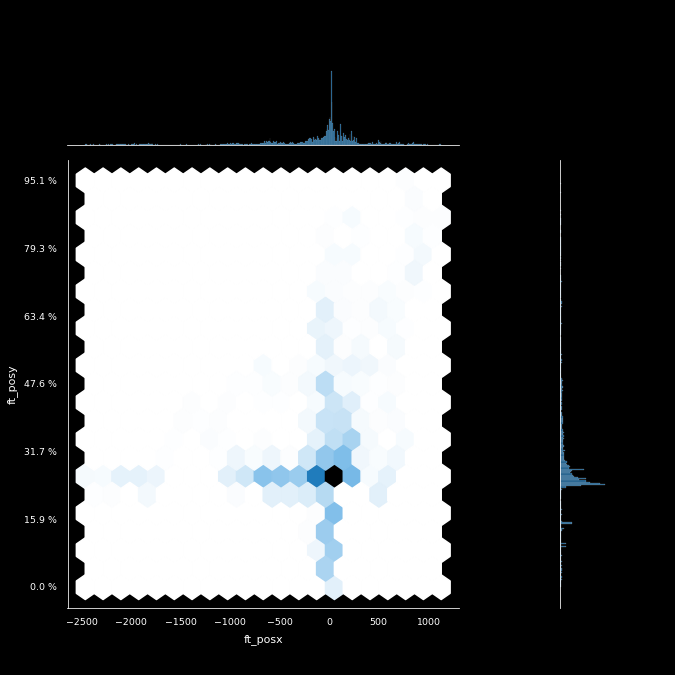

/tmp/ipykernel_930869/4234369947.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  kdeplot.fig.axes[-1].set_yticklabels([f'{t / cbar_max * 100:.1f} %' for t in cbar_ticks])


In [20]:
kdeplot = sns.jointplot(data=df, x="ft_posx", y="ft_posy", kind="hex",
              joint_kws=dict(gridsize=20))
             #marginal_kws=dict(bins=1000, fill=False))
# make new ax object for the cbar
# cbar_ax = hexplot.fig.add_axes([.85, .25, .05, .4])  # x, y, width, height
# pl.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)  # shrink fig so cbar is visible
# # make new ax object for the cbar
# cbar_ax = hexplot.fig.add_axes([.85, .25, .05, .4])  # x, y, width, height
# pl.colorbar(cax=cbar_ax)

pl.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)
pos_joint_ax = kdeplot.ax_joint.get_position()
pos_marg_x_ax = kdeplot.ax_marg_x.get_position()
kdeplot.ax_joint.set_position([pos_joint_ax.x0, pos_joint_ax.y0, pos_marg_x_ax.width,
                               pos_joint_ax.height])
kdeplot.fig.axes[-1].set_position([.83, pos_joint_ax.y0, .07, pos_joint_ax.height])

# get the current colorbar ticks
cbar_ticks = kdeplot.fig.axes[-1].get_yticks()
# get the maximum value of the colorbar
_, cbar_max = kdeplot.fig.axes[-1].get_ylim()
# change the labels (not the ticks themselves) to a percentage
kdeplot.fig.axes[-1].set_yticklabels([f'{t / cbar_max * 100:.1f} %' for t in cbar_ticks])

pl.show()